## agenda

1. what are outliers?
2. What is the rsn of having outliers in data?
3. what is the impact ?
4. how to detect the outliers ?
5. How to handle outliers ?

# What are Outliers ?
- Outliers are values in the data that are very large or very small as compared to the majority of the values in the data.

# what is the reason of having outliers in the data.

# What is the impact of outliers ?

# How to detect outliers
1. Non-Visual - IQR , Z-score
2. Visual - Boxplots(univarient technique) , scatter plots(bivarient)

In [1]:
# IQR - Inter quartile range

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r"C:\Users\Tanvi\Downloads\placement_data (1)\placement_data.xls")
df

cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
998  8.62                  46.0       1
999  4.90                  10.0       1

[1000 rows x 3 columns]

In [5]:
# checking outliers with box plot

<Axes: >

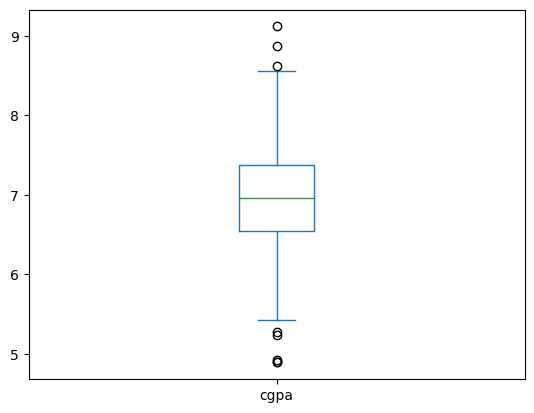

In [6]:
df['cgpa'].plot(kind = 'box')

<Axes: >

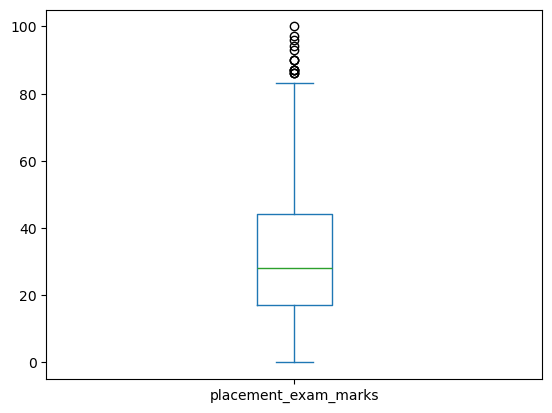

In [7]:
df['placement_exam_marks'].plot(kind = 'box')

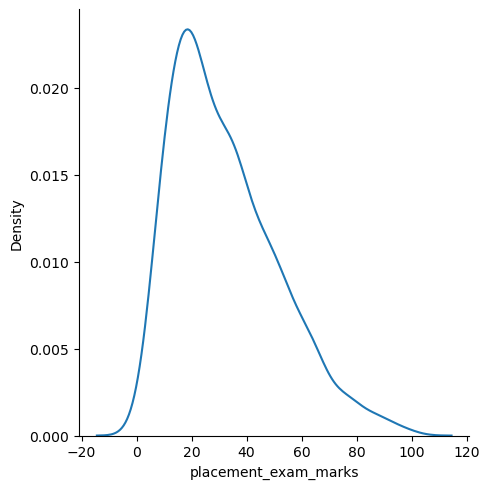

In [8]:
import seaborn as sns
sns.displot(df['placement_exam_marks'] , kind = 'kde')

In [9]:
sns.displot(df['cgpa'] , kind = 'kde')

**Note** - As the placement_exam_marks data is not normally distributed , we will use IQR and cgpa is normally distributed so we will use z_score method to handle outliers.

# `Handling outliers in placement_exam_marks with IQR`
# `1. Trimming`

In [10]:
# step 1 - find Q1 and Q3

In [13]:
q1 = df['placement_exam_marks'].quantile(0.25)
q3 = df['placement_exam_marks'].quantile(0.75)
q1,q3

(np.float64(17.0), np.float64(44.0))

In [14]:
# step 2 - calculate IQR
iqr = q3 - q1
iqr

np.float64(27.0)

In [15]:
# step 3 - find lower bound and uper bpund

In [16]:
lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr
lb,ub

(np.float64(-23.5), np.float64(84.5))

In [23]:
# step 4 -detecting outliers

In [19]:
df[ (df['placement_exam_marks'] < lb) | (df['placement_exam_marks'] > ub) ]

cgpa  placement_exam_marks  placed
9    7.75                  94.0       1
40   6.60                  86.0       1
61   7.51                  86.0       0
134  6.33                  93.0       0
162  7.80                  90.0       0
283  7.09                  87.0       0
290  8.38                  87.0       0
311  6.97                  87.0       1
324  6.64                  90.0       0
630  6.56                  96.0       1
685  6.05                  87.0       1
730  6.14                  90.0       1
771  7.31                  86.0       1
846  6.99                  97.0       0
917  5.95                 100.0       0

In [24]:
# strp 5 -handling them

In [22]:
df[ (df['placement_exam_marks'] > lb) & (df['placement_exam_marks'] < ub) ]

cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
998  8.62                  46.0       1
999  4.90                  10.0       1

[985 rows x 3 columns]

# `Handling outliers in placement_exam_marks with IQR`
# `2. Capping` - Replacing outliers with lb and ub

In [25]:
df

cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
998  8.62                  46.0       1
999  4.90                  10.0       1

[1000 rows x 3 columns]

<Axes: >

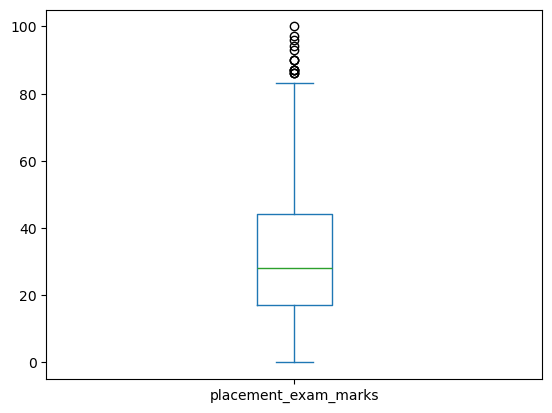

In [26]:
df['placement_exam_marks'].plot(kind = 'box')

In [28]:
lb,ub

(np.float64(-23.5), np.float64(84.5))

In [31]:
# Replacing outloers with lb and ub
df['placement_exam_marks'] = df['placement_exam_marks'].apply(lambda x : lb if x < lb else ub if x > ub else x)

<Axes: >

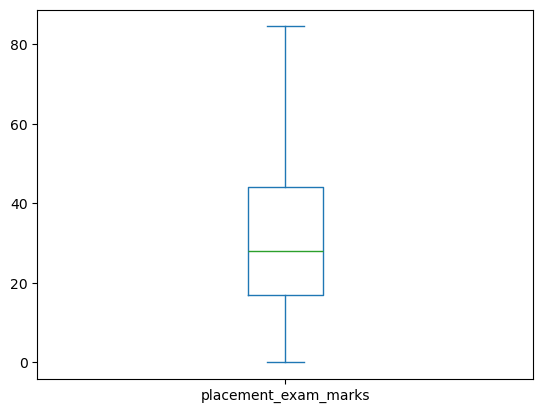

In [30]:
df['placement_exam_marks'].plot(kind = 'box')

# Z - score
- A z score measures how far a datapoint is from the mean in terms of standard deviation.
- formula - z score = (x - mean) / SD

## if absolute value of z is > 3 the data point is comsidered as an outlier

In [32]:
# our col cgpa is following normal distribution so we can apply z -score technique for detecting and handling outlier.

In [33]:
# step 1 - calculate mean , sd

In [34]:
mean = df['cgpa'].mean()
SD = df['cgpa'].std()

In [35]:
# step 2 - calculate z - score

In [36]:
df['zscore'] = (df['cgpa'] - mean) / SD

In [37]:
df

cgpa  placement_exam_marks  placed    zscore
0    7.19                  26.0       1  0.371425
1    7.46                  38.0       1  0.809810
2    7.54                  40.0       1  0.939701
3    6.42                   8.0       1 -0.878782
4    7.23                  17.0       0  0.436371
..    ...                   ...     ...       ...
995  8.87                  44.0       1  3.099150
996  9.12                  65.0       1  3.505062
997  4.89                  34.0       0 -3.362960
998  8.62                  46.0       1  2.693239
999  4.90                  10.0       1 -3.346724

[1000 rows x 4 columns]

In [ ]:
# step 3 - filter our data points where |z score| > 3

# Detecting the outliers

In [38]:
df[np.abs(df['zscore']) > 3]

cgpa  placement_exam_marks  placed    zscore
485  4.92                  44.0       1 -3.314251
995  8.87                  44.0       1  3.099150
996  9.12                  65.0       1  3.505062
997  4.89                  34.0       0 -3.362960
999  4.90                  10.0       1 -3.346724

In [39]:
# Handling outliers

In [40]:
# technique 1 - trimming

In [41]:
df_cleaned_zscore = df[np.abs(df['zscore']) < 3]

In [42]:
df_cleaned_zscore

cgpa  placement_exam_marks  placed    zscore
0    7.19                  26.0       1  0.371425
1    7.46                  38.0       1  0.809810
2    7.54                  40.0       1  0.939701
3    6.42                   8.0       1 -0.878782
4    7.23                  17.0       0  0.436371
..    ...                   ...     ...       ...
991  7.04                  57.0       0  0.127878
992  6.26                  12.0       0 -1.138565
993  6.73                  21.0       1 -0.375452
994  6.48                  63.0       0 -0.781363
998  8.62                  46.0       1  2.693239

[995 rows x 4 columns]

<Axes: >

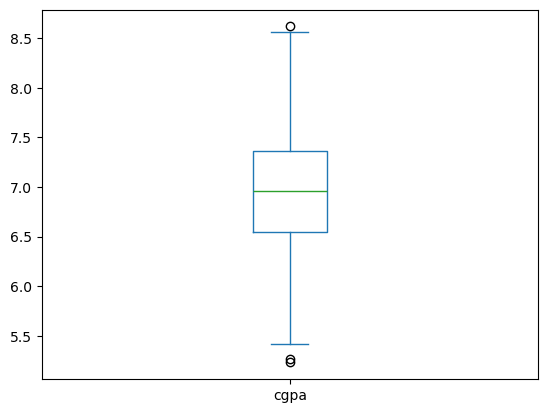

In [44]:
df_cleaned_zscore['cgpa'].plot(kind = 'box')

In [45]:
df_cleaned_zscore = df[np.abs(df['zscore']) < 2.5]

In [46]:
df_cleaned_zscore['cgpa'].plot(kind = 'box')

<Axes: >

**Note** - capping is not possible in z score